In [ ]:
!git clone https://github.com/rslim087a/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 23.01 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [ ]:
!ls track

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

In [ ]:
from imgaug import augmenters as iaa
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import sys
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
datadir = "track"
#         ["merkez","sol","sağ","direksiyon","gaz kelebeği","geri","hız"]
columns = ["center","left","right","steering","throttle","reverse","speed"]
df = pd.read_csv(os.path.join(datadir,"driving_log.csv"))
df.columns = columns

pd.set_option("display.max_colwidth",-1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_930.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_930.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_930.jpg,0.0,0.0,0.0,0.610506


In [ ]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

df["center"] = df["center"].apply(path_leaf)
df["left"] = df["left"].apply(path_leaf)
df["right"] = df["right"].apply(path_leaf)

In [ ]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
1,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
2,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
3,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
4,center_2018_07_16_17_11_43_930.jpg,left_2018_07_16_17_11_43_930.jpg,right_2018_07_16_17_11_43_930.jpg,0.0,0.0,0.0,0.610506


In [ ]:
df["steering"].nunique(),df["steering"].max(),df["steering"].min()

(580, 1.0, -1.0)

In [ ]:
num_bins = 25

hist, bins = np.histogram(df["steering"], num_bins)
hist,bins

(array([  35,    6,    6,    6,   13,    8,   24,   22,   53,  131,   99,
         158, 2989,  137,   86,  126,   54,   22,   19,    2,    9,    4,
           4,    6,   33]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]))

In [ ]:
# Farklı bak !!
len(hist),len(bins)

(25, 26)

In [ ]:
bins[1:],bins[:-1]

(array([-0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36, -0.28,
        -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,  0.44,
         0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92]))

In [ ]:
center = (bins[1:] + bins[:-1]) * 0.5
len(center),len(hist),len(bins)

(25, 25, 26)

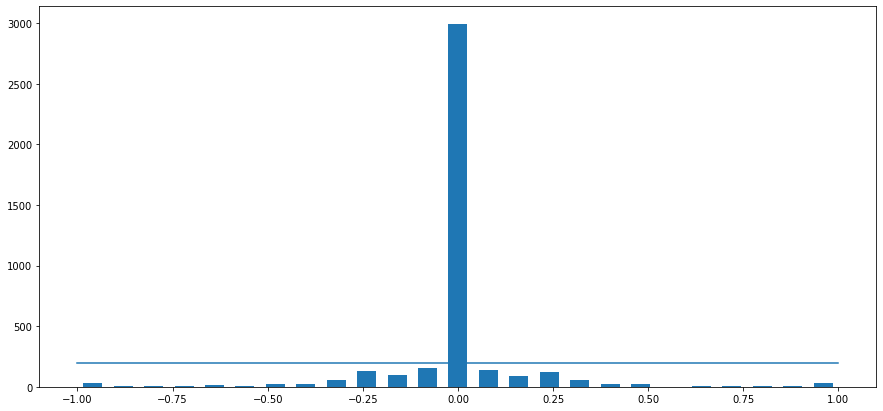

In [ ]:
samples_per_bin = 400

plt.figure(figsize = (15,7))
plt.bar(center,hist,width = 0.05)
plt.plot( (np.min(df["steering"]), np.max(df["steering"])),(samples_per_bin,samples_per_bin) ,)
plt.show()

In [ ]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [ ]:
print("Total Data : ", len(df))

remove_list = []

samples_per_bin = 400
num_bins = 25

for j in range(num_bins):
    list_ = []
    for i in range(len(df["steering"])):
        
        # Bins arasındaki değeri istiyoruz yani -1 ile -0.92 arasında ve kendileride dahil !!!
        if df["steering"][i] >= bins[j] and df["steering"][i] <= bins[j+1]:
            list_.append(i)
    #print()
    list_ = shuffle(list_)
    #print("Shuflle : ", len(list_))
    list_ = list_[samples_per_bin:]
    #print("400 > :", len(list_))
    remove_list.extend(list_)
    #print()

print("Removed : ", len(remove_list))
df.drop(df.index[remove_list], inplace = True)
print("Remaning : ", len(df))

Total Data :  4052
Removed :  2589
Remaning :  1463


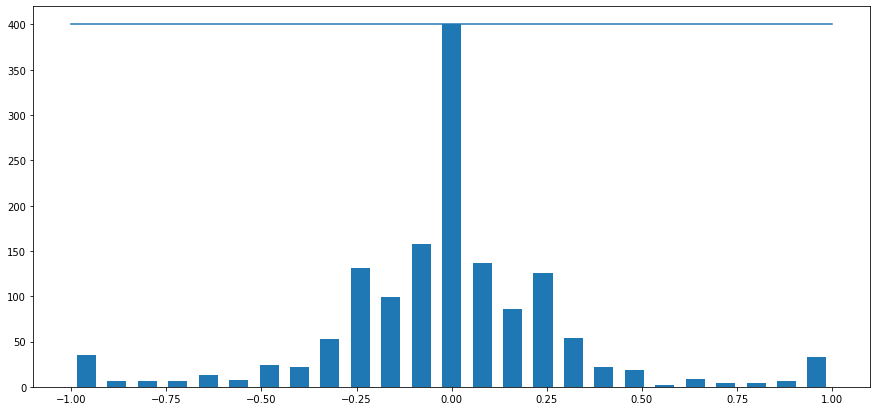

In [ ]:
# Bunu yapmamızdaki amaç şu normalde 0 değeri çok fazla olması bizim eğitim verimiz için çok artı bir durum değil
# Aracın sağa sola gitmesi önemli 
# 0 değerinin çok olması yani düz gitme ihtimali her zaman daha çok fazla olması 
# Eğitimde bize sıkıntı oluşturur

hist, _ = np.histogram(df["steering"], num_bins)

plt.figure(figsize = (15,7))
plt.bar(center,hist,width = 0.05)
plt.plot( (np.min(df["steering"]), np.max(df["steering"])),(samples_per_bin,samples_per_bin) ,)
plt.show()

In [ ]:
df.iloc[0]

center      center_2018_07_16_17_11_43_792.jpg
left        left_2018_07_16_17_11_43_792.jpg  
right       right_2018_07_16_17_11_43_792.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       0.619162                          
Name: 2, dtype: object

In [ ]:
def load_img_steering(datadir, data):

    image_path = []
    steering = []
    for i in range(len(data)):

        indexed_data = data.iloc[i]
        center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))

    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)

    return image_paths, steerings

In [ ]:
image_paths, steerings = load_img_steering(datadir + "/IMG", df)

In [ ]:
X_train ,X_test , y_train, y_test = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1170,), (293,), (1170,), (293,))

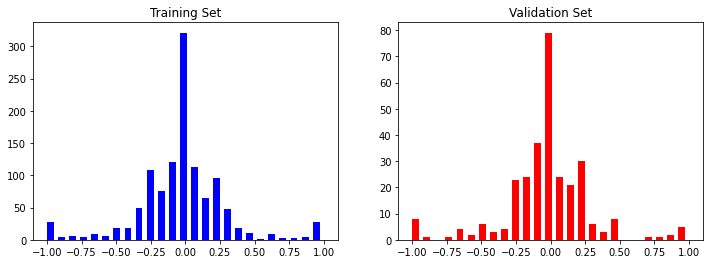

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (12,4))

axes[0].hist(y_train, bins = num_bins, width = 0.05 , color = "blue")
axes[0].set_title("Training Set")

axes[1].hist(y_test, bins = num_bins, width = 0.05 , color = "red")
axes[1].set_title("Validation Set")

plt.show()

In [ ]:
def zoom(image):
    zoom = iaa.Affine(scale = (1, 1.3))
    image = zoom.augment_image(image)
    return image

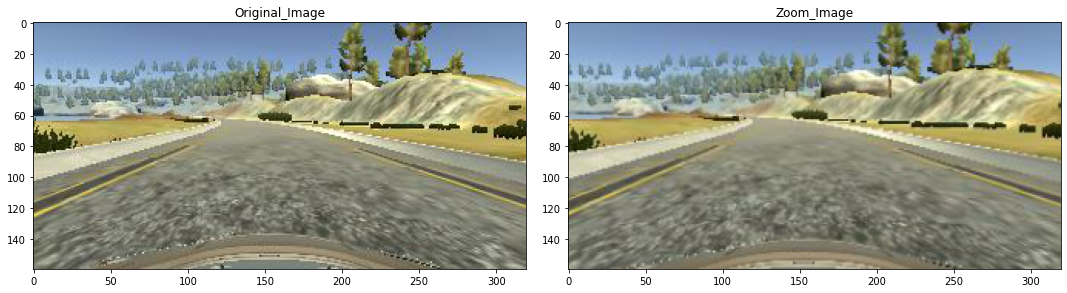

In [ ]:
image = image_paths[np.random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig , axes = plt.subplots(1,2, figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original_Image")

axes[1].imshow(zoomed_image)
axes[1].set_title("Zoom_Image")

plt.show()

In [ ]:
def pan(image):
    pan = iaa.Affine(translate_percent = {"x" : (-0.1,0.1), "y" : (-0.1,0.1)})
    image = pan.augment_image(image)
    return image

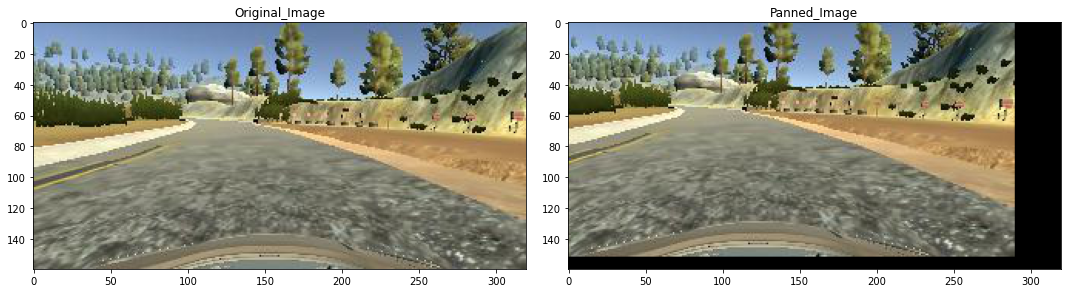

In [ ]:
image = image_paths[np.random.randint(0,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig , axes = plt.subplots(1,2, figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original_Image")

axes[1].imshow(panned_image)
axes[1].set_title("Panned_Image")

plt.show()

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2,1.2))
    image = brightness.augment_image(image)
    return image

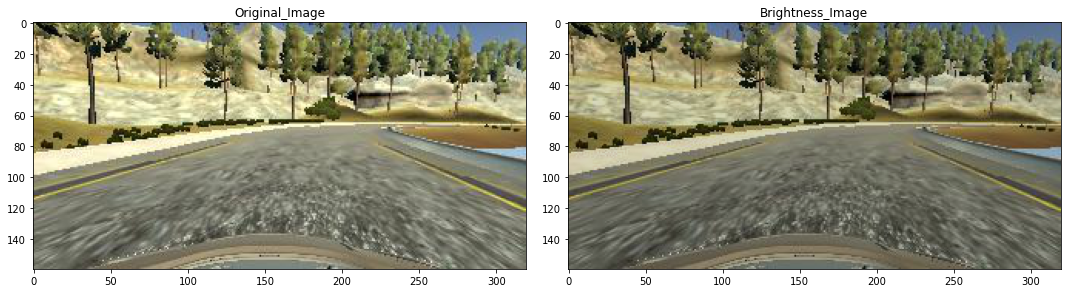

In [ ]:
image = image_paths[np.random.randint(0,1000)]
original_image = mpimg.imread(image)
brightness_image = img_random_brightness(original_image)

fig , axes = plt.subplots(1,2, figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original_Image")

axes[1].imshow(brightness_image)
axes[1].set_title("Brightness_Image")

plt.show()

In [ ]:
def img_random_flip(image, steering_angle):
    # 1 horizantal
    # 0 vertical
    # -1 both of them !!!

    image = cv2.flip(image, 1,)
    steering_angle = - steering_angle
    return image, steering_angle

In [ ]:
steerings

array([0., 0., 0., ..., 0., 0., 0.])

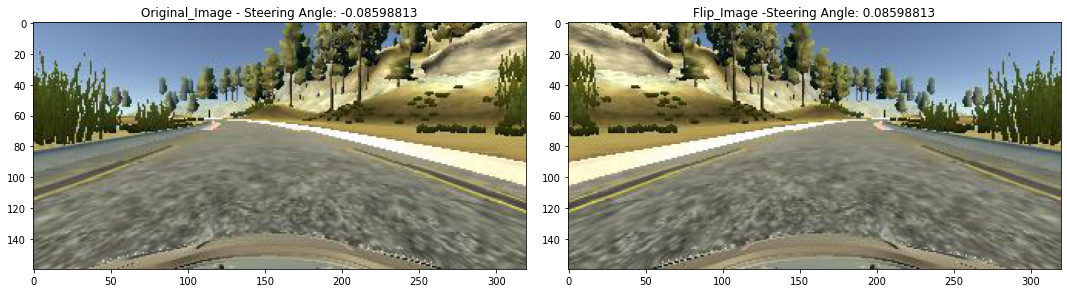

In [ ]:
random_index = np.random.randint(0,1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image,steering_angle)


fig , axes = plt.subplots(1,2, figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original_Image - " + "Steering Angle: " + str(steering_angle))

axes[1].imshow(flipped_image)
axes[1].set_title("Flip_Image -" + "Steering Angle: " + str(flipped_steering_angle))

plt.show()

In [ ]:
np.random.rand() < 0.5,np.random.rand()

(False, 0.5923209036694451)

In [ ]:
def random_augment(image, steering_angle):

    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image,steering_angle = img_random_flip(image,steering_angle)
    return image,steering_angle

In [ ]:
ncol = 2
nrow = 10

fig , axes = plt.subplots(nrow, ncol, figsize=(15,50))
fig.tight_layout()

for i in range(10):
    random = np.random.randint(0,len(image_paths)-1)
    random_image = image_paths[random]
    random_steering = steerings[random]

    original_image = mpimg.imread(random_image)
    augmented_image,steering = random_augment(random_image,random_steering)

    axes[i][0].imshow(original_image)
    axes[i][0].set_title("Original Image")

    axes[i][1].imshow(augmented_image)
    axes[i][1].set_title("Augmented Image")
    

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def img_preprocess(img):

    #img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,ksize = (3,3),sigmaX = 0)
    img = cv2.resize(img,(200,66))
    img = img / 255
    return img

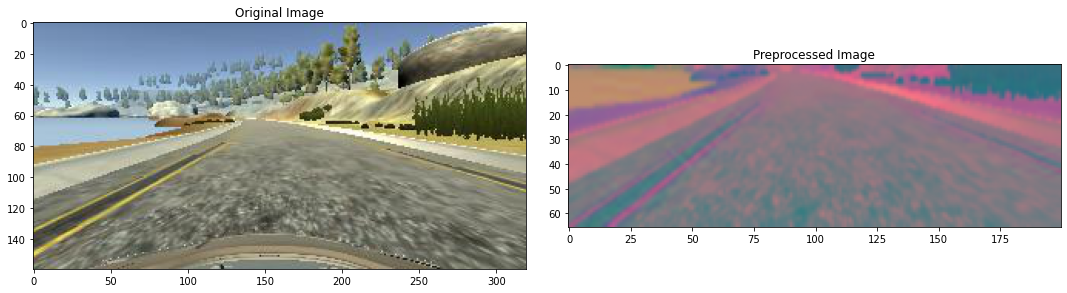

In [ ]:
index = image_paths[100]

original_image= mpimg.imread(index)

preprocessed_image = img_preprocess(original_image)

fig ,axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")

axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")

plt.show()

In [ ]:
#X_train = np.array(list(map(img_preprocess,X_train)))
#X_test = np.array(list(map(img_preprocess,X_test)))

In [ ]:
#i = np.random.randint(0, len(X_train) - 1)

#plt.imshow(X_train[i])
#plt.title(f"Shape : {X_train[i].shape}")
#plt.show()

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = np.random.randint(0, len(image_paths) - 1)
            
            if istraining:
                img, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                img = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)
        
        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_test_gen, y_test_gen = next(batch_generator(X_test, y_test, 1, 0))

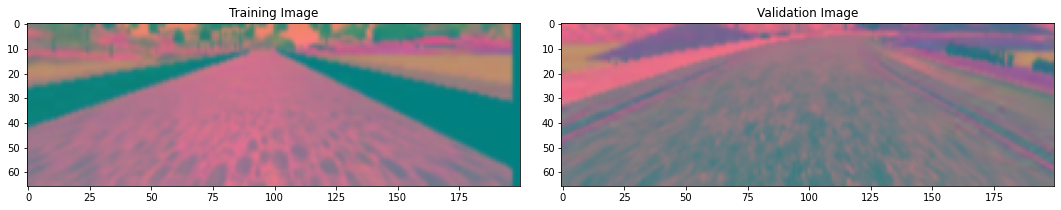

In [ ]:
fig ,axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

i = 0
axes[0].imshow(x_train_gen[i])
axes[0].set_title("Training Image")

axes[1].imshow(x_test_gen[i])
axes[1].set_title("Validation Image")

plt.show()

In [ ]:
def nvidia_model():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Convolution2D(filters = 24,  kernel_size = (5,5), strides = (2,2), activation = "elu", input_shape = (66,200,3)))
    model.add(tf.keras.layers.Convolution2D(filters = 36,  kernel_size = (5,5), strides = (2,2), activation = "elu"))
    model.add(tf.keras.layers.Convolution2D(filters = 48,  kernel_size = (5,5), strides = (2,2), activation = "elu"))
    model.add(tf.keras.layers.Convolution2D(filters = 64,  kernel_size = (3,3), activation = "elu"))
    
    model.add(tf.keras.layers.Convolution2D(filters = 64,  kernel_size = (3,3),  activation = "elu"))
    #model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units = 100, activation = "elu"))
    #model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Dense(units = 50, activation = "elu"))
    #model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Dense(units = 10, activation = "elu"))
    #model.add(tf.keras.layers.Dropout(rate = 0.5))

    model.add(tf.keras.layers.Dense(units = 1))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4), loss = "mse")

    return model

In [ ]:
model = nvidia_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_16 (Dense)            (None, 100)              

In [ ]:
h = model.fit_generator(batch_generator(X_train, y_train, batch_size = 100,istraining= 1), 
                        steps_per_epoch = 300, 
                        epochs = 10,
                        validation_data = batch_generator(X_test, y_test, batch_size = 100,istraining= 0), 
                        validation_steps = 200, 
                        verbose = 1, 
                        shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 216s 720ms/step - loss: 0.0738 - val_loss: 0.0556
Epoch 2/10
300/300 [==============================] - 214s 717ms/step - loss: 0.0629 - val_loss: 0.0512
Epoch 3/10
300/300 [==============================] - 214s 716ms/step - loss: 0.0578 - val_loss: 0.0481
Epoch 4/10
300/300 [==============================] - 214s 717ms/step - loss: 0.0503 - val_loss: 0.0403
Epoch 5/10
300/300 [==============================] - 213s 711ms/step - loss: 0.0470 - val_loss: 0.0330
Epoch 6/10
300/300 [==============================] - 212s 710ms/step - loss: 0.0427 - val_loss: 0.0312
Epoch 7/10
300/300 [==============================] - 214s 716ms/step - loss: 0.0404 - val_loss: 0.0299
Epoch 8/10
300/300 [==============================] - 216s 721ms/step - loss: 0.0382 - val_loss: 0.0304
Epoch 9/10
300/300 [==============================] - 216s 721ms/step - loss: 0.0366 - val_loss: 0.0307
Epoch 10/10
300/300 [==============================] - 214s 715m

In [ ]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,5))
    plt.subplot(121)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.title("Loss Score")
    plt.legend(loc = "best")
    plt.xticks(range(0,epochs + 1))

    plt.tight_layout()
    plt.show()

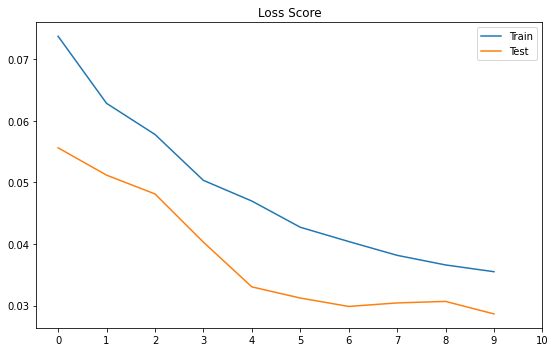

In [ ]:
history_graph(h, 10 )

In [ ]:
model.save("new_model.h5")

In [ ]:
from google.colab import files

In [ ]:
files.download("new_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>